<a href="https://colab.research.google.com/github/one-last-time/FTFL/blob/main/Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],[2,5],[5,6],[3,4],[6,7],
              [12,5],[3,1],[3,8],[4,7],[10, 2], [11, 4], [10, 0]])
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
print(kmeans.labels_)
print(kmeans.predict([[0, 0], [12, 3]]))
print(kmeans.cluster_centers_)
print(kmeans.inertia_)

[1 3 1 3 2 3 2 0 1 2 2 0 0 0]
[1 0]
[[10.75        2.75      ]
 [ 1.66666667  1.        ]
 [ 4.5         7.        ]
 [ 2.          4.33333333]]
31.833333333333332


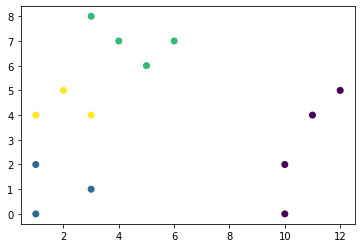

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_.astype(float))
plt.show()

In [ ]:
K = range(1,15)
inertias = []
mapping = []
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
  inertias.append(kmeans.inertia_)
  

In [ ]:
for i in inertias:
  print(i)

294.6428571428571
110.8
48.666666666666664
31.833333333333332
17.333333333333332
12.333333333333332
9.666666666666666
7.666666666666666
5.666666666666666
3.9999999999999996
2.9999999999999996
1.9999999999999996
0.9999999999999996
0.0


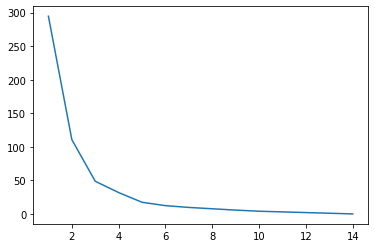

In [ ]:
plt.plot(K,inertias)

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:68: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


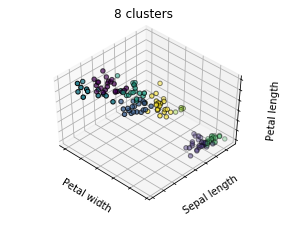

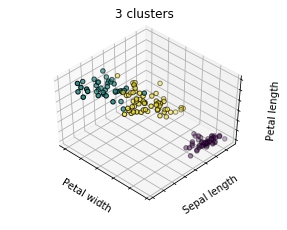

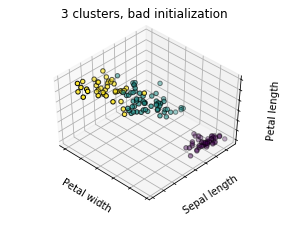

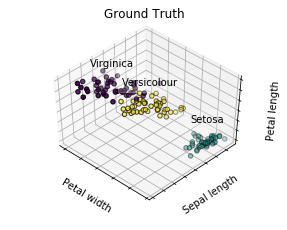

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

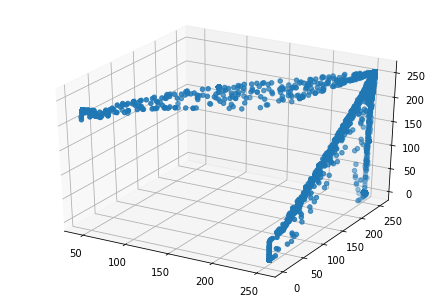

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2
img = cv2.imread("img/i.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()
#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [ ]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
original_image = cv2.imread("img/i2.jpeg")
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)


## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.05)

In [ ]:
dbscan = DBSCAN(eps=0.20, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

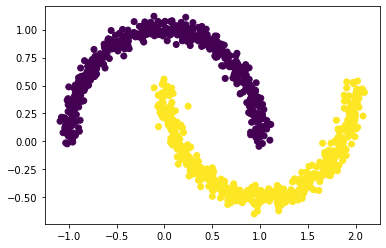

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=dbscan.labels_.astype(float))
plt.show()

In [ ]:
dbscan.labels_


array([ 0,  1,  2,  3,  4,  5,  5,  6, -1,  6,  2,  1,  1,  7,  1,  6,  0,
        1,  2,  2,  1,  1, -1,  1,  2,  1,  7,  5,  0,  7,  2,  0,  2,  7,
        6,  3, -1,  6, -1,  1,  6,  1,  2,  0,  2,  2,  3,  1,  1,  3,  7,
        8,  7,  6,  6,  0, -1,  1, -1,  0,  2, -1,  7,  0,  5,  1,  2,  6,
        1,  1,  2,  0,  1,  1,  1,  1, -1,  6,  7,  2,  0,  6,  1,  8,  0,
        1,  6,  2, -1,  7,  7,  6,  7,  1,  4,  2,  2,  5,  2,  6,  1,  1,
        3,  1,  0,  2,  3,  4,  2,  0,  3,  7,  1,  3,  8,  8,  3,  4,  1,
       -1,  4,  1,  7,  8,  1,  1,  1,  7,  8,  4,  8,  1,  0,  2,  1,  2,
        1,  3,  1,  5,  8,  4,  1,  4,  2,  4,  1,  2,  2,  2,  1,  1,  2,
       -1,  6,  6,  2,  6, -1,  1,  1,  2,  2,  7,  6,  4,  7,  2,  2, -1,
        8,  1,  1,  1,  7,  0,  8,  1,  7,  1,  6,  1,  5,  5,  2,  1,  4,
        7,  1,  2,  2,  7,  0,  1, -1,  1,  1,  3,  1,  1,  6,  2,  1,  7,
        6,  4,  1,  2,  5,  3,  2,  7,  2, -1,  0,  4, 11, -1, 11,  7,  7,
        2,  2, -1,  1,  7

Notice that some instances have a cluster index equal to -1: this means that they are
considered as anomalies by the algorithm.  The indices of the core instances are avail‐
able in the core_sample_indices_ instance variable, and the core instances them‐
selves are available in the components_ instance variable:

In [ ]:
len(dbscan.core_sample_indices_)

800

In [ ]:
dbscan.core_sample_indices_


array([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  12,  14,
        15,  16,  17,  19,  20,  21,  23,  24,  26,  27,  28,  29,  30,
        31,  32,  33,  35,  37,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  49,  50,  51,  52,  54,  55,  57,  59,  60,  62,  63,  64,
        66,  67,  68,  69,  70,  72,  73,  74,  75,  77,  78,  80,  81,
        82,  83,  84,  85,  86,  87,  89,  90,  91,  92,  94,  95,  96,
        97,  98, 100, 101, 102, 103, 105, 107, 108, 109, 111, 112, 113,
       114, 115, 116, 117, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 154, 155,
       156, 157, 159, 160, 161, 162, 163, 164, 165, 167, 168, 170, 172,
       174, 175, 176, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
       188, 189, 190, 192, 193, 195, 196, 197, 198, 199, 201, 202, 203,
       204, 205, 206, 207, 208, 209, 211, 212, 214, 215, 219, 22

In [ ]:
 dbscan.components_


array([[ 2.02523614,  0.41223138],
       [ 1.80506442,  0.00307616],
       [-0.19842894,  1.04931615],
       ...,
       [ 1.77933898, -0.07852115],
       [ 1.65791031, -0.22246109],
       [-0.43368922,  0.85600892]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [ ]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])

In [ ]:
knn.predict(X_new)


array([3, 5, 8, 0], dtype=int64)

In [ ]:
knn.predict_proba(X_new)

array([[0.  , 0.  , 0.  , 0.66, 0.  , 0.22, 0.  , 0.1 , 0.  , 0.  , 0.  ,
        0.02, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.02, 0.98, 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ],
       [0.  , 0.22, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.76, 0.  , 0.02,
        0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ]])

## GMM

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [ ]:
gm.weights_


array([0.6051826 , 0.20213923, 0.19267817])

In [ ]:
gm.means_


array([[ 0.48770815,  0.26314673],
       [ 1.74455936, -0.05458223],
       [-0.77097165,  0.53806363]])

In [ ]:
gm.covariances_


array([[[ 0.1802407 , -0.11260098],
        [-0.11260098,  0.29831581]],

       [[ 0.05137848,  0.06119803],
        [ 0.06119803,  0.08800753]],

       [[ 0.04514116,  0.05677471],
        [ 0.05677471,  0.08463486]]])

## PCA

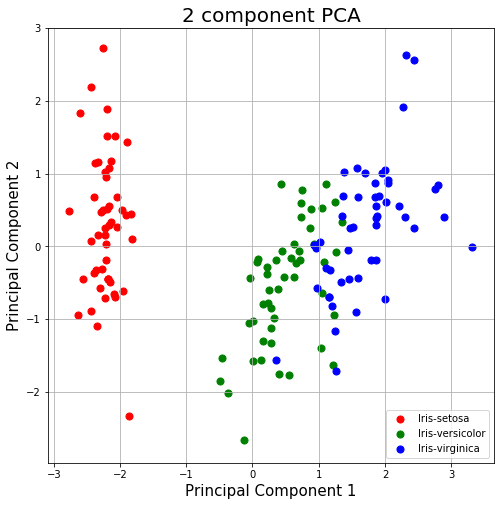

In [ ]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])


# Standardize the Data

from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

IndexError: index 2 is out of bounds for axis 1 with size 2

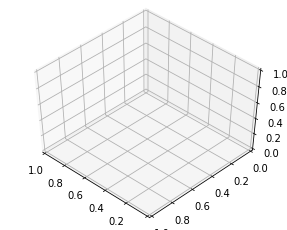

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()